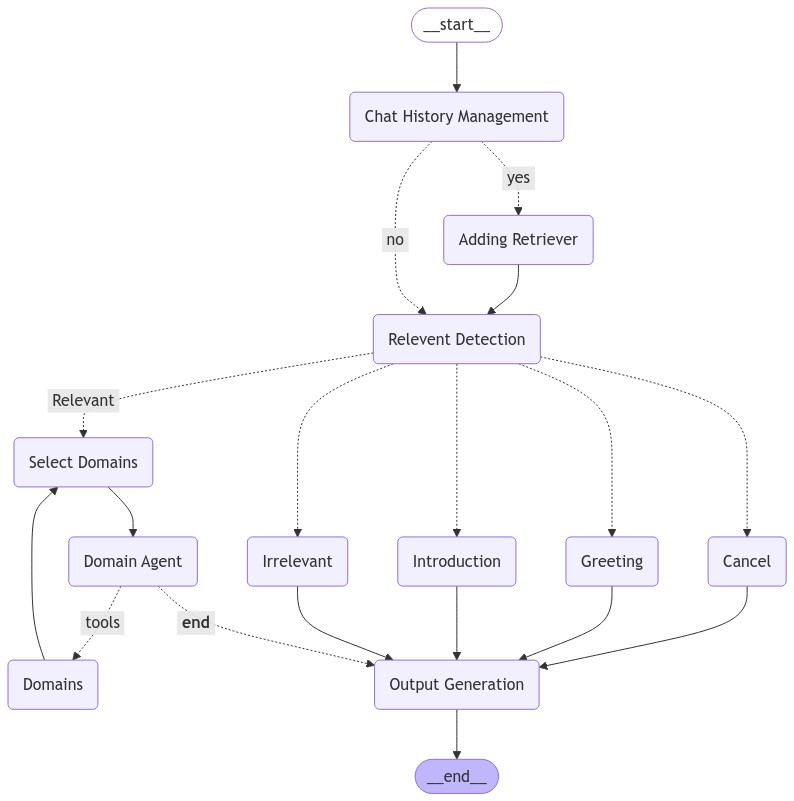


Subject:  Greeting
Prompt: Hello!
Answer: {'domain': 'Greeting', 'message': "Hello! It's great to connect with you. How can I assist you today?"}
Inference: 0.8

Prompt: How are you?
Answer: {'domain': 'Greeting', 'message': "I'm doing well, thank you for asking! How can I assist you today?"}
Inference: 0.46



KeyError: 'tool_calls'

In [1]:
import time
from main import Main
from IPython.display import Image, display


sample_prompts_relevance = {
    
    "Greeting": 
    [
        "Hello!",
        "How are you?",
        "How's everything?",
        "Hi!",
    ],


    "Introduction": 
    [
        "Who are you?",
        "How can you help me?",
        "What can you do?",
    ],


    "Irrelevant": 
    [
    "How is the weather today?",
    "Tell me about the rules of the basketball.",
    "How to make a bread?",
    ],


    "Cancel":
    [
        "I don't want to continue with odering this anymore!",
        "Cancel context",
        "Forget it.",
        "Halt.",
        "Abort!",
        "I do not wish to proceed!",
        "Let's start over!",
        "Forget previous conversation.",
        "Ditch our on going convo.",
        "Fuck this. I'm out."
    ],


    "Relevant": 
    [
        "Find an apartment for rent.",
        "How much rent should I pay in avarage to live in tehran?",
        "I want to order a pizza.",
        "I have a stomachache. I need to see a doctor.",
        "Buy me a train ticket.",
    ]
}


user = Main(user_id=1, chat_session=1)
display(Image(user.graph.get_graph().draw_mermaid_png()))

for subject in sample_prompts_relevance:
    print(f"\nSubject:  {subject}")
    prompts = sample_prompts_relevance[subject]
    num_correct = 0
    for prompt in prompts:
        start = time.time()
        results = user.run(user_prompt=prompt)
        end = time.time()
        answer = results[-1]["Output Generation"]["output_json"]
        if answer["domain"] == subject:
            num_correct += 1
        print(f"Prompt: {prompt}\nAnswer: {answer}\nInference: {round(end-start, 2)}\n")
        time.sleep(1)
    print(f"The result of the test of subject {subject}:  {num_correct}/{len(prompts)}\n\n")

# Testing Tool Calling

In [2]:
from langchain_core.pydantic_v1 import BaseModel, Field


class add(BaseModel):
    """Add two integers."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")


class multiply(BaseModel):
    """Multiply two integers."""

    a: int = Field(..., description="First integer")
    b: int = Field(..., description="Second integer")

/home/tensurf_developer/miniconda3/envs/sepehr/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
from typing_extensions import Annotated, TypedDict
from langchain_core.pydantic_v1 import BaseModel, Field


class add(TypedDict):
    """Add two integers."""

    # Annotations must have the type and can optionally include a default value and description (in that order).
    a: Annotated[int, ..., "First integer"]
    b: Annotated[int, ..., "Second integer"]


class multiply(BaseModel):
    """Multiply two integers."""

    a: Annotated[int, ..., "First integer"]
    b: Annotated[int, ..., "Second integer"]


tools = [add, multiply]

In [4]:
import os

os.environ["GROQ_API_KEY"] = "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"

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")

llm_with_tools = llm.bind_tools(tools)

query = "What is 3 * 12?"

llm_with_tools.invoke(query)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_06bv', 'function': {'arguments': '{"a":3,"b":12}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 1048, 'total_tokens': 1120, 'completion_time': 0.06, 'prompt_time': 0.12772047, 'queue_time': 0.002212317999999991, 'total_time': 0.18772047}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_a97cfe35ae', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-2cd205b3-649c-49b1-93dd-cec526e1c224-0', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': 'call_06bv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1048, 'output_tokens': 72, 'total_tokens': 1120})

In [ ]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls

In [ ]:
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool
from typing import Optional, Type

from langchain.callbacks.manager import (
    AsyncCallbackManagerForToolRun,
    CallbackManagerForToolRun,
)


class SearchInput(BaseModel):
    query: str = Field(description="should be a search query")


class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")


class CustomSearchTool(BaseTool):
    name = "custom_search"
    description = "useful for when you need to answer questions about current events"
    args_schema: Type[BaseModel] = SearchInput

    def _run(
        self, query: str, run_manager: Optional[CallbackManagerForToolRun] = None
    ) -> str:
        """Use the tool."""
        return "LangChain"

    async def _arun(
        self, query: str, run_manager: Optional[AsyncCallbackManagerForToolRun] = None
    ) -> str:
        """Use the tool asynchronously."""
        raise NotImplementedError("custom_search does not support async")


class CustomCalculatorTool(BaseTool):
    name = "Calculator"
    description = "useful for when you need to answer questions about math"
    args_schema: Type[BaseModel] = CalculatorInput
    return_direct: bool = True

    def _run(
        self, a: int, b: int, run_manager: Optional[CallbackManagerForToolRun] = None
    ) -> str:
        """Use the tool."""
        return a * b

    async def _arun(
        self,
        a: int,
        b: int,
        run_manager: Optional[AsyncCallbackManagerForToolRun] = None,
    ) -> str:
        """Use the tool asynchronously."""
        raise NotImplementedError("Calculator does not support async")


search = CustomSearchTool()
print(search.name)
print(search.description)
print(search.args)

multiply = CustomCalculatorTool()
print(multiply.name)
print(multiply.description)
print(multiply.args)
print(multiply.return_direct)